<a href="https://colab.research.google.com/github/Abdul-Lahad/PyTorch-Tutorial/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import numpy as np
import torch.nn as nn
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline


In [17]:
# 0) data prepration

X_numpy, Y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20 , random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
Y = torch.from_numpy(Y_numpy.astype(np.float32))
Y = Y.view(Y.shape[0],1)


# 1) model defination

class LinearRegression(nn.Module):
    def __init__(self,input_dim,output_dim):
        super(LinearRegression,self).__init__()
        self.lin = nn.Linear(input_dim,output_dim)

    def forward(self,x):
      return self.lin(x)

model = LinearRegression(X.shape[1],Y.shape[1])

# 2) loss and opimizer

learning_rate = 0.1
critarion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)

# 3) training lopp

num_epochs = 100
for epoch in range(num_epochs):
  y_pred = model(X)

  loss = critarion(y_pred,Y)

  loss.backward()

  optimizer.step()

  optimizer.zero_grad()

  if (epoch % 10 == 0 ):
    [w,b] = model.parameters()
    print(f'epoch = {epoch}, w: {w[0][0]}, loss : {loss.item():.3f}')


epoch = 0, w: 12.46479320526123, loss : 5843.396
epoch = 10, w: 69.80998992919922, loss : 509.551
epoch = 20, w: 80.15596771240234, loss : 338.603
epoch = 30, w: 82.05304718017578, loss : 332.777
epoch = 40, w: 82.40416717529297, loss : 332.575
epoch = 50, w: 82.4695053100586, loss : 332.568
epoch = 60, w: 82.481689453125, loss : 332.568
epoch = 70, w: 82.48397827148438, loss : 332.568
epoch = 80, w: 82.4843978881836, loss : 332.568
epoch = 90, w: 82.4844741821289, loss : 332.568


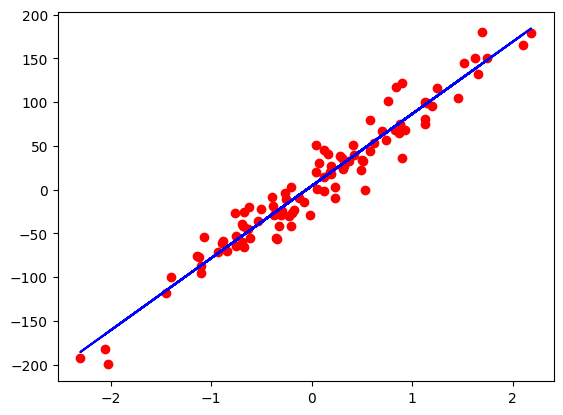

In [18]:
#plot the graph

#we call our final model now, with all the data and now we want to convert this to numpy back again
#but before we do that we want to detach our tensor so we want to prevent this operation from being tracked in our graph,the our computational graph
#because right now this tens are here I have a typo predicted so this tensor has the required gradients argument set to true
#but now we want this to fall to be false so this will generate a new tensor where our gradient calculation attribute is false so this is our new tensor
#and then we just call the number function now we convert it to numpy

predicted = model(X).detach().numpy()
plt.plot(X_numpy,Y_numpy,'ro')
plt.plot(X_numpy,predicted,'b')
plt.show()